In [5]:
using Pkg, Revise, VegaLite
Pkg.activate("../.")
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, Colors
using VegaGraphs

 Activating environment at `~/MEGAsync/EMAp/VegaGraphs/Project.toml`


In [6]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

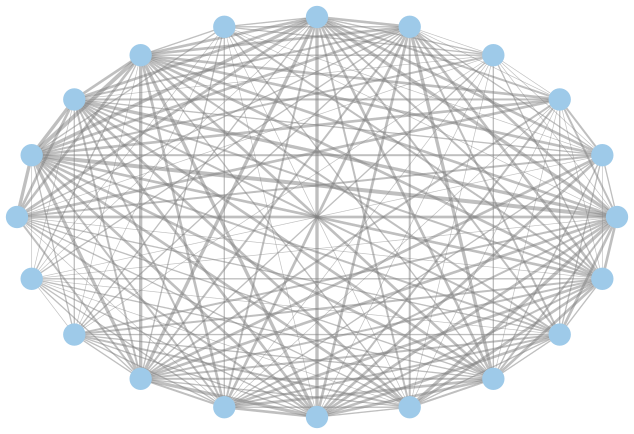

In [7]:
VegaGraphs.graphplot(df,GraphPlot.circular_layout,tooltip=true,node_label=false)